# 01 - Quick Start

Get up and running with trend_classifier in under 5 minutes.

## What You'll Learn
- Install the package
- Segment a time series into trends
- Visualize the results

## Prerequisites
```bash
pip install trend-classifier yfinance
```

## Step 1: Import and Download Data

In [1]:
import yfinance as yf

from trend_classifier import Segmenter

# Download Apple stock data (4 years of daily prices)
df = yf.download("AAPL", start="2018-09-15", end="2022-09-05", interval="1d", progress=False)
print(f"Downloaded {len(df)} data points")

Downloaded 999 data points


## Step 2: Create Segmenter and Calculate Segments

The `Segmenter` class is the main entry point. Pass your data and a window size `n`.

In [2]:
# Create segmenter - can pass DataFrame directly
seg = Segmenter(df=df, column="Close", n=20)

# Calculate segments (this finds regions with similar trends)
segments = seg.calculate_segments()

print(f"Found {len(segments)} segments")

Found 49 segments


## Step 3: Visualize Results

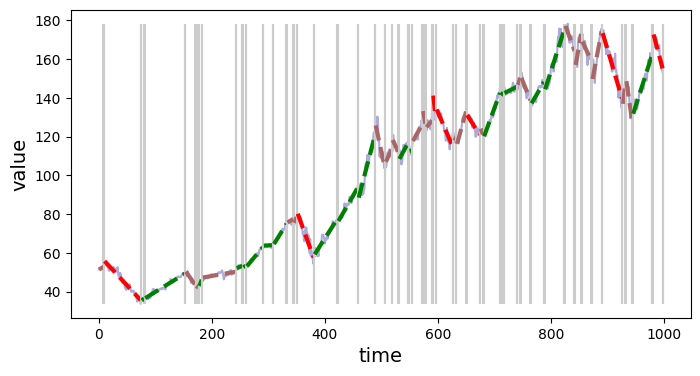

In [3]:
# Plot all segments with trend lines
seg.plot_segments()

**Reading the plot:**
- Blue line: Original price data
- Green dashed lines: Upward trends
- Red dashed lines: Downward trends
- Gray vertical lines: Segment boundaries

## Step 4: Access Segment Information

In [4]:
# Get the first segment
first_segment = seg.segments[0]
print(f"First segment: index {first_segment.start} to {first_segment.stop}")
print(f"Slope: {first_segment.slope:.4f}")

First segment: index 0 to 9
Slope: 0.1975


In [5]:
# Quick summary of all segments
for i, s in enumerate(seg.segments):
    direction = "↑" if s.slope > 0 else "↓"
    print(f"Segment {i}: {direction} slope={s.slope:+.3f}, length={s.stop - s.start}")

Segment 0: ↑ slope=+0.198, length=9
Segment 1: ↓ slope=-0.315, length=65
Segment 2: ↑ slope=+0.105, length=5
Segment 3: ↑ slope=+0.180, length=71
Segment 4: ↓ slope=-0.418, length=17
Segment 5: ↓ slope=-0.253, length=5
Segment 6: ↑ slope=+0.759, length=5
Segment 7: ↑ slope=+0.052, length=59
Segment 8: ↑ slope=+0.094, length=11
Segment 9: ↑ slope=+0.291, length=5
Segment 10: ↑ slope=+0.350, length=29
Segment 11: ↑ slope=+0.022, length=17
Segment 12: ↑ slope=+0.471, length=23
Segment 13: ↑ slope=+0.063, length=11
Segment 14: ↑ slope=+0.537, length=5
Segment 15: ↓ slope=-0.789, length=29
Segment 16: ↑ slope=+0.453, length=41
Segment 17: ↑ slope=+0.508, length=35
Segment 18: ↑ slope=+1.137, length=29
Segment 19: ↓ slope=-1.245, length=17
Segment 20: ↑ slope=+0.543, length=11
Segment 21: ↓ slope=-0.602, length=11
Segment 22: ↑ slope=+0.501, length=17
Segment 23: ↑ slope=+0.490, length=5
Segment 24: ↑ slope=+0.560, length=17
Segment 25: ↓ slope=-1.274, length=5
Segment 26: ↑ slope=+0.605, le

## Next Steps

- **02_segment_analysis.py** - Deep dive into segment properties
- **03_visualization.py** - All plotting methods
- **04_configuration.py** - Tuning parameters for better results